## Porto Seguro’s Safe Driver Prediction


#### Introduction

"Nothing ruins the thrill of buying a brand new car more quickly than seeing your new insurance bill. The sting’s even more painful when you know you’re a good driver. It doesn’t seem fair that you have to pay so much if you’ve been cautious on the road for years"

Insurance is the largest industry with multitude of different types of insurance policies available Such as General and Life insurance.Here we are going to discuss about Auto insurance which comes under General insurance. Basically, insurance is a contract in which one party agrees to indemnify another for any loss that occurs under the terms of the contract.To understand more deeper about evalution and history of insurance then here is the [link](
https://www.youtube.com/watch?v=Y34JChoVrzE&t=533s/ "Youtube link"). Further, Insurance has different modules such as Underwriting,Claims,Finance & Reinsurance.For this Project, We have chosen large Insurance dataset from kaggle [link](
https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/overview "Kaggle link") which is extracted from Insurance company called 'Porto Seguro' one of Brazil's largest auto and homeowner insurance companies, completely agrees. Inaccuracies in car insurance company’s claim predictions raise the cost of insurance for good drivers and reduce the price for bad ones. This project is based on claims module so before analysing the data let us understand the process behind claims department.   


An insurance claim is a formal request to an insurance company asking for a payment based on the terms of the insurance policy. The insurance company reviews the claim for its validity and then pays out to the insured or requesting party (on behalf of the insured) once approved. It basically involves four step process which is represented in the below flow chart

![](Claimflowchart.JPG)

These claim process involves key activites such as registering the claim,Policy validation,Appointing Surveyor,Calling supporting documents,Scrutiny of documents,Processing claim,Approval/Rejection of claim,Payment of claim

Thumb rule of processing any claim as to be within the policy period which means the policy taken by the customer should be active at the time of claim.

#### Claim Intimation/Notification

Claim Intimation is the process of formal notification by a policyholder to an insurance company for coverage or compensation for a covered loss or policy event.This can be through any mode, say in person, over phone, mail or through company website.Based on this information, the policy details are verified and claim is registered.

#### Claim Registration

Once the claim is notified, the claim is registered based on claim notification number. To Register a claim, set of mandatory details are required such as Insured name,Policy number,Loss date,Nature of loss,Cause of Loss and any specific product based or loss based additional information. Based on these details the claim is registered.

#### Claim Estimation/Reserve

After the claim is registered, the loss estimate is submitted by the insured. Here the estimate given by the insured should not exceed the policy sum insured. The details that would be available here is estimate number, Amount of estimate,Date of estimate and spare parts.

#### Claim Settlement

Based on claim estimation,the claims department validates the documents and Scrutiny report to settle Partial or full final amount after deductions (deductibles which is to be deducted from loss assessed). If the policy is not 100% retained by the Insurance company then the remaining percentage of money will be collected from reinsurance companies to settle that claim.

#### Research Question & Problem Statement

The Aim of this project is to build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year and Clustering that will show us the group of people who claims the most. A more accurate prediction will allow them to further tailor their prices, and hopefully make auto insurance coverage more accessible to more drivers.

### Importing libraries for data import,cleaning and visualization

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

import pickle

# Visualisation
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# ignore warnings for now
import warnings
warnings.filterwarnings("ignore")

### Data Description
1. Features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). 
2. Feature names include the postfix bin to indicate binary features and cat to indicate categorical features. 
3. Features without these designations are either continuous or ordinal. 
4. Values of -1 indicate that the feature was missing from the observation. 
5. The target columns signifies whether or not a claim was filed for that policy holder.

#### Reading csv data using pandas dataframe

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# View the training data
train.head(10)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1,4,0,0,0,0,0,...,4,2,0,9,0,1,0,1,1,1
6,20,0,2,1,3,1,0,0,1,0,...,3,0,0,10,0,1,0,0,1,0
7,22,0,5,1,4,0,0,1,0,0,...,7,1,3,6,1,0,1,0,1,0
8,26,0,5,1,3,1,0,0,0,1,...,4,2,1,5,0,1,0,0,0,1
9,28,1,1,1,2,0,0,0,1,0,...,3,5,0,6,0,1,0,0,1,0


In [4]:
# View the testing data
test.head(10)

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1
5,5,0,1,6,0,0,1,0,0,0,...,8,1,4,9,1,0,1,0,1,0
6,6,0,1,3,0,0,0,1,0,0,...,2,0,4,6,1,1,0,0,0,0
7,8,0,1,0,0,0,1,0,0,0,...,3,1,4,9,0,1,0,0,0,0
8,10,0,1,7,0,0,0,1,0,0,...,5,1,4,6,0,0,1,0,0,0
9,11,1,1,6,0,0,0,0,0,1,...,6,1,6,10,0,1,1,0,0,0


#### Here the train data has 59 variables (features) and 595212 records while the test data has 58 variables (features) and 892816 records. There is a different of 1 variable between train and test data. The additional variable is the target variable which is part of the training data. 

In [5]:
print('train data size', train.shape)
print('test data size', test.shape)
train.info()

train data size (595212, 59)
test data size (892816, 58)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16 

### EDA Analysis

Before start of data preparation let us look at exploratory data analysis on raw dataset.In which the below visualization's are based on important features in the dataset.

#### Target variable plot

The below bar graph shows that the data is highly imbalanced. As described in the data overview that '0' represents the customers with no claim and '1' represents the customers filed for claim for insurance. The bar graph reveals that most of the people are not claiming insurance. A small percentage of people are claiming for insurance.

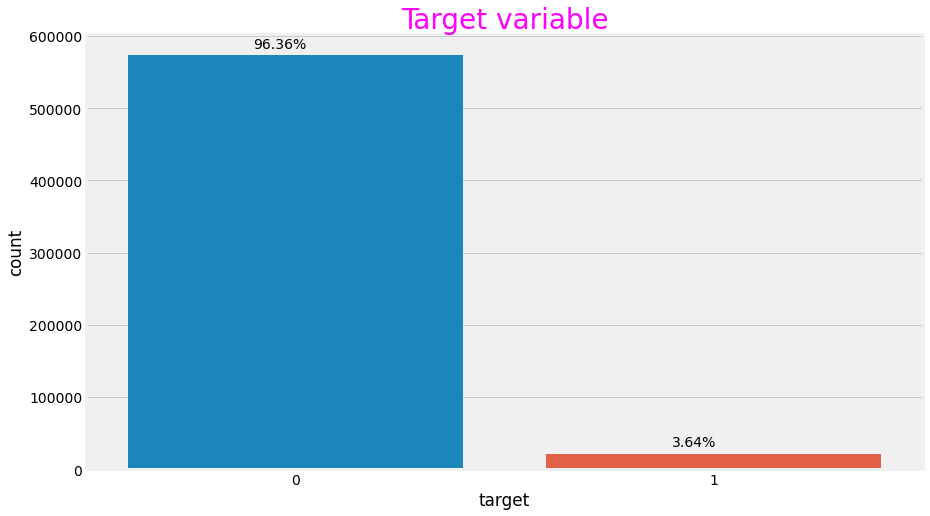

In [6]:
plt.figure(figsize=(15,8))
matplotlib.style.use('fivethirtyeight')

ax = sns.countplot('target', data=train)
plt.title("Target variable", size=28, color='magenta')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(train['target'])), 
                (p.get_x() + 0.3, p.get_height() + 10000))
 

#### Features with missing data in Training Dataseet plot

Here the plot is based on the features with most missing data. There are five features in the dataset with most missing data. The first feature with most missing data is 'ps_car_03_cat' and second most feature with most missing data is 'ps_car_05_cat'. Other features such as ps_reg_03,ps_car_14,ps_car_07_cat are also amoung the top five missing data chart. To get accurate analysis and findings the features with most missing data are removed.

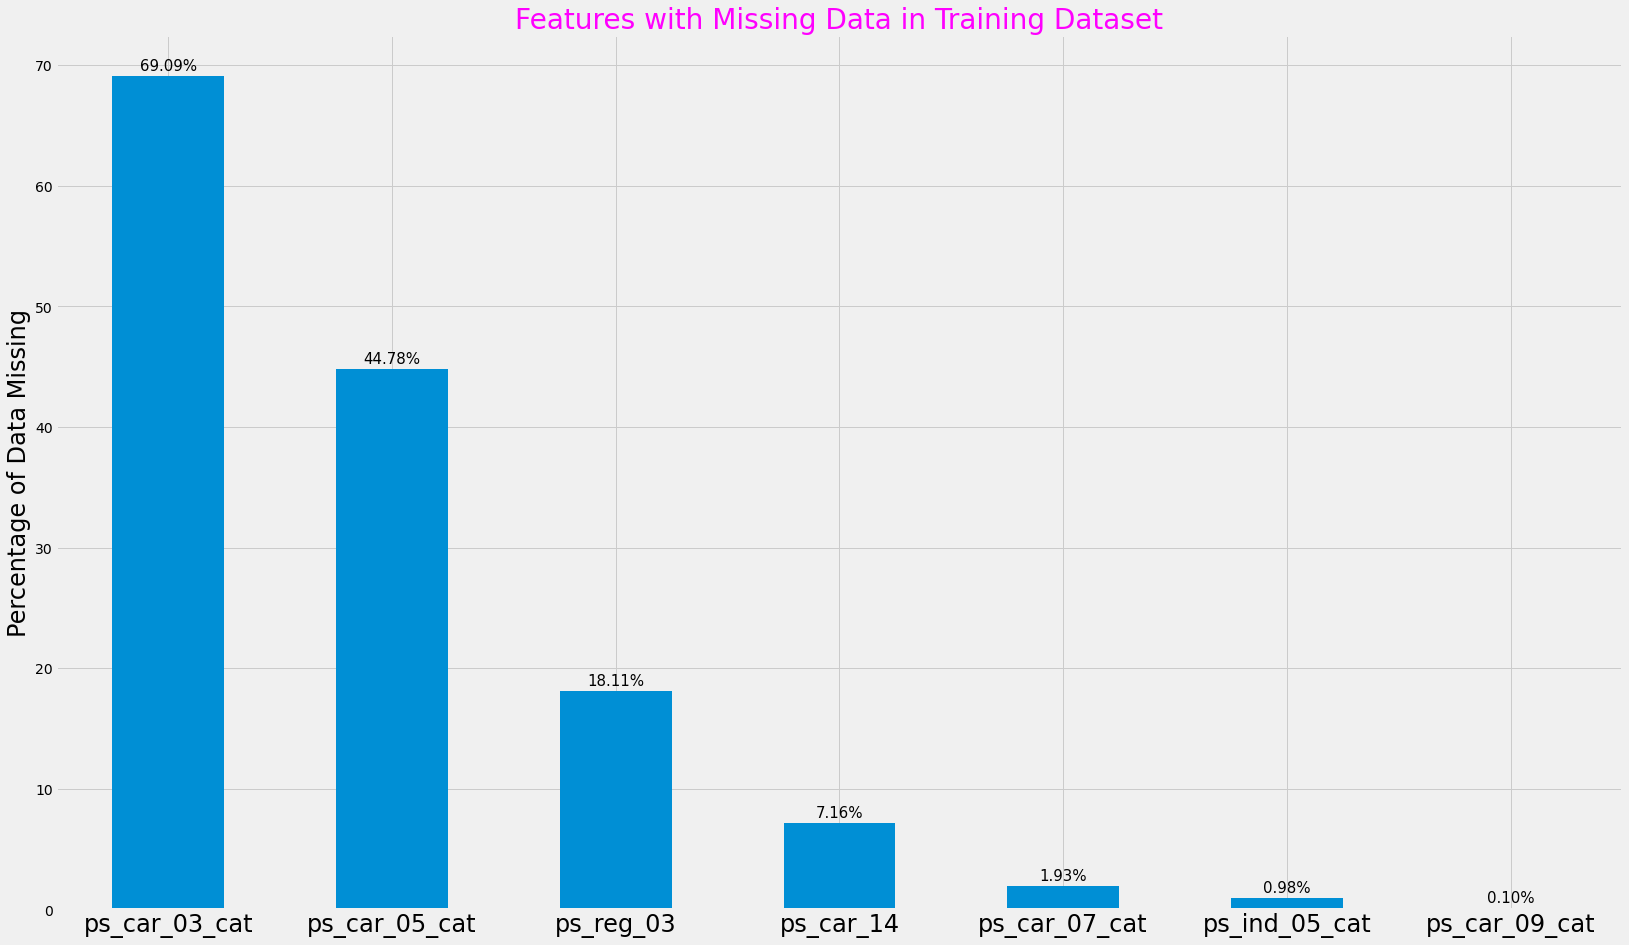

In [7]:
df_missing_train = pd.DataFrame(
    {'column':train.columns, 
     'missing(%)':((train==-1).sum()/train.shape[0])*100})


plt.rcParams['figure.figsize']=(25, 10)
matplotlib.style.use('fivethirtyeight')

df_missing_train_nl = df_missing_train.nlargest(7, 'missing(%)')

splot = df_missing_train_nl.plot(kind="bar")
plt.title("Features with Missing Data in Training Dataset", size=28, color='magenta')
plt.ylabel('Percentage of Data Missing', size=24)
plt.xticks(rotation='horizontal')
splot.get_legend().remove()
splot.xaxis.set_tick_params(labelsize=24)


for p in splot.patches:
    splot.annotate('{:.2f}%'.format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15, xytext = (0, 10), textcoords = 'offset points')
plt.show()

* ### The total missing values is zero (0) because the missing values is represented by -1

* ### Let's see the total missing values

In [8]:
train.replace(to_replace=-1,value=np.nan,inplace=True)

In [9]:
print(f"The missing value {train.isnull().sum().sum()}" )

The missing value 846458


In [10]:
train.replace(to_replace=-1,value=np.nan,inplace=True)

In [11]:
train.isnull().sum().sort_values(ascending=False)

ps_car_03_cat     411231
ps_car_05_cat     266551
ps_reg_03         107772
ps_car_14          42620
ps_car_07_cat      11489
ps_ind_05_cat       5809
ps_car_09_cat        569
ps_ind_02_cat        216
ps_car_01_cat        107
ps_ind_04_cat         83
ps_car_02_cat          5
ps_car_11              5
ps_car_12              1
ps_ind_03              0
ps_ind_18_bin          0
target                 0
ps_ind_01              0
ps_reg_02              0
ps_reg_01              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_15              0
ps_car_04_cat          0
ps_ind_13_bin          0
ps_ind_12_bin          0
ps_ind_11_bin          0
ps_ind_10_bin          0
ps_ind_09_bin          0
ps_ind_08_bin          0
ps_ind_07_bin          0
ps_ind_06_bin          0
ps_ind_14              0
ps_calc_20_bin         0
ps_car_06_cat          0
ps_calc_19_bin         0
ps_calc_18_bin         0
ps_calc_17_bin         0
ps_calc_16_bin         0
ps_calc_15_bin         0
ps_calc_14             0


* ### There are manys way in dealing with missing values. In this project we will take the follwing measures.
> * ### We will drop this column because wroughly 70% of the data is missing
> * ### We will fill the __Categorical__ variables with __Mode__ ('cat' and 'bin')
> * ### We will fill the __Continious__ variables with __Mean__
> * ### We will fill the __Ordinal__ variables with __Mode__

In [12]:
train.drop('ps_car_03_cat', axis = 1, inplace = True)

train['ps_car_05_cat'].fillna(int(train['ps_car_05_cat'].mode()),inplace=True)
train['ps_car_07_cat'].fillna(int(train['ps_car_07_cat'].mode()),inplace=True)
train['ps_ind_05_cat'].fillna(int(train['ps_ind_05_cat'].mode()),inplace=True)
train['ps_car_09_cat'].fillna(int(train['ps_car_09_cat'].mode()),inplace=True)

train['ps_car_01_cat'].fillna(int(train['ps_car_01_cat'].mode()),inplace=True)
train['ps_car_02_cat'].fillna(int(train['ps_car_02_cat'].mode()),inplace=True)
train['ps_ind_02_cat'].fillna(int(train['ps_ind_02_cat'].mode()),inplace=True)
train['ps_ind_04_cat'].fillna(int(train['ps_ind_04_cat'].mode()),inplace=True)

train['ps_car_11'].fillna(int(train['ps_car_14'].mean()),inplace=True)
train['ps_car_12'].fillna(int(train['ps_car_14'].mean()),inplace=True)
train['ps_car_14'].fillna(int(train['ps_car_14'].mean()),inplace=True)
train['ps_reg_03'].fillna(int(train['ps_reg_03'].mean()),inplace=True)

train.isnull().sum().sum()

0

### Categorical Features: Metadata
### - Description: What we want to do here is to divide our variables into different categories and store them as DataFrame
> #### -  Categorical
> #### - Binary
> #### - Ordinal
> #### - Continous (integer and float)

### Let's see the information we have before we start creating MetaData 

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  float64
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  float64
 6   ps_ind_05_cat   595212 non-null  float64
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

* #### We want to create categorical and binary dataframe from the train features ending with 'cat' or 'bin'

In [14]:
train_variables = train.columns.tolist()

cat_variable = []
for catig in train_variables:
    if 'cat' in catig:
        cat_variable.append(catig)
cat_variable_df = pd.DataFrame({'Categorical features': cat_variable})

bin_variable = []
for bina in train_variables:
    if 'bin' in bina:
        bin_variable.append(bina)
        level = 'binary'
bin_variable_df = pd.DataFrame({'Binary features': bin_variable})

* #### We want to create ordinal dataframe from the train features which does not contain both 'id' and 'target'features and variabls ending with 'cat' or 'bin' 

In [15]:
int_variables = train.select_dtypes(include=['int64']).columns.tolist()

ordinal_features = []
for ord in int_variables: 
    if ('cat' not in ord and 'bin' not in ord and 'id' not in ord and 'target' not in ord ):
        ordinal_features.append(ord)
            
ord_features_df = pd.DataFrame({'Ordinal features': ordinal_features})

* #### We want to create Numerical Continuous dataframe from the remaining train features.

In [16]:
cont_variables = train.select_dtypes(include=['float64']).columns.tolist()

continuous_features = []

for ord in cont_variables: 
    if 'cat' not in ord:
        continuous_features.append(ord)
               
cont_features_df = pd.DataFrame({'Numerical Continuous features': continuous_features})

cont_features_df_int = cont_features_df[~cont_features_df['Numerical Continuous features'].isin( ['ps_calc_01','ps_calc_02','ps_calc_03'])]
cont_features_df_float = cont_features_df[cont_features_df['Numerical Continuous features'].isin( ['ps_calc_01','ps_calc_02','ps_calc_03'])]

#### Variable count across each datatype

Here the bar plot represents the number of variables with different datatypes. The binary datatype are the maximum number of features available.Followed by ordinal datatype with second highest number of features. Other datatypes such as category and contineous datatype features are also available in the dataset.

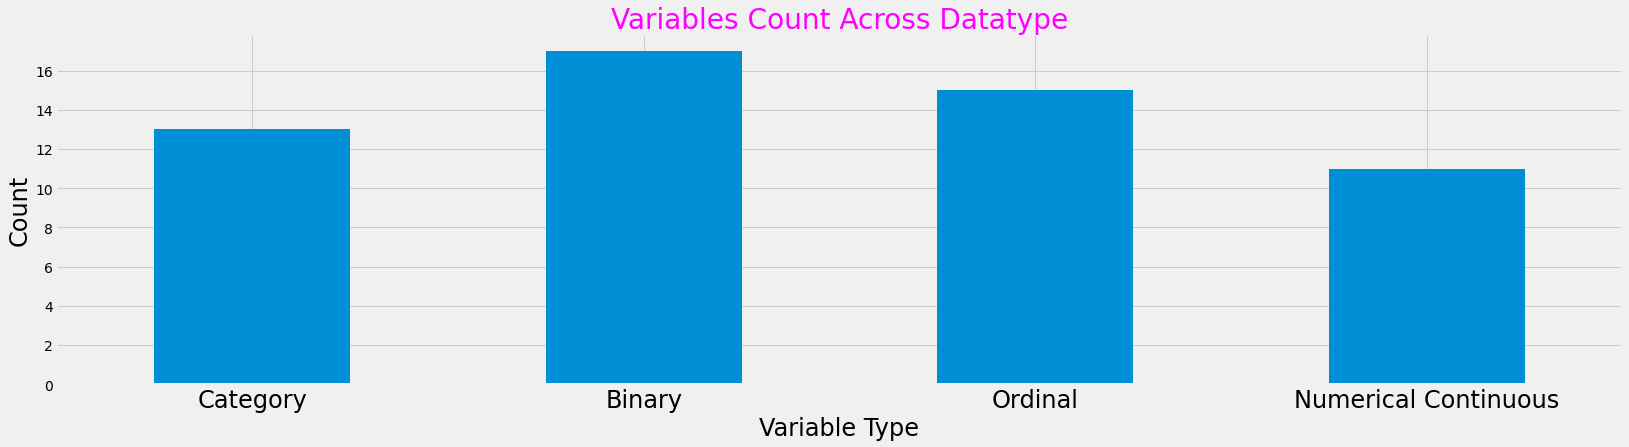

In [17]:
data1 = pd.concat( [cat_variable_df, bin_variable_df, ord_features_df, cont_features_df_int, cont_features_df_float], ignore_index=True)

plt.rcParams['figure.figsize']=(25, 6)
matplotlib.style.use('fivethirtyeight')

cat_count = data1['Categorical features'].count()
bin_count = data1['Binary features'].count()
ord_count = data1['Ordinal features'].count()
con_count = data1['Numerical Continuous features'].count()

plotdata = pd.DataFrame(
    {"varables": [cat_count,bin_count,ord_count,con_count]}, 
    index=["Category", "Binary", "Ordinal", "Numerical Continuous"]).plot(kind="bar")

plt.title("Variables Count Across Datatype", size=28, color='magenta')
plt.xticks(rotation=0, horizontalalignment="center", size=24)
plt.xlabel("Variable Type", size=24)
plt.ylabel("Count", size=24)
plotdata.get_legend().remove()

plt.show()

### Categorical Feature Visualisation (cat dataset)

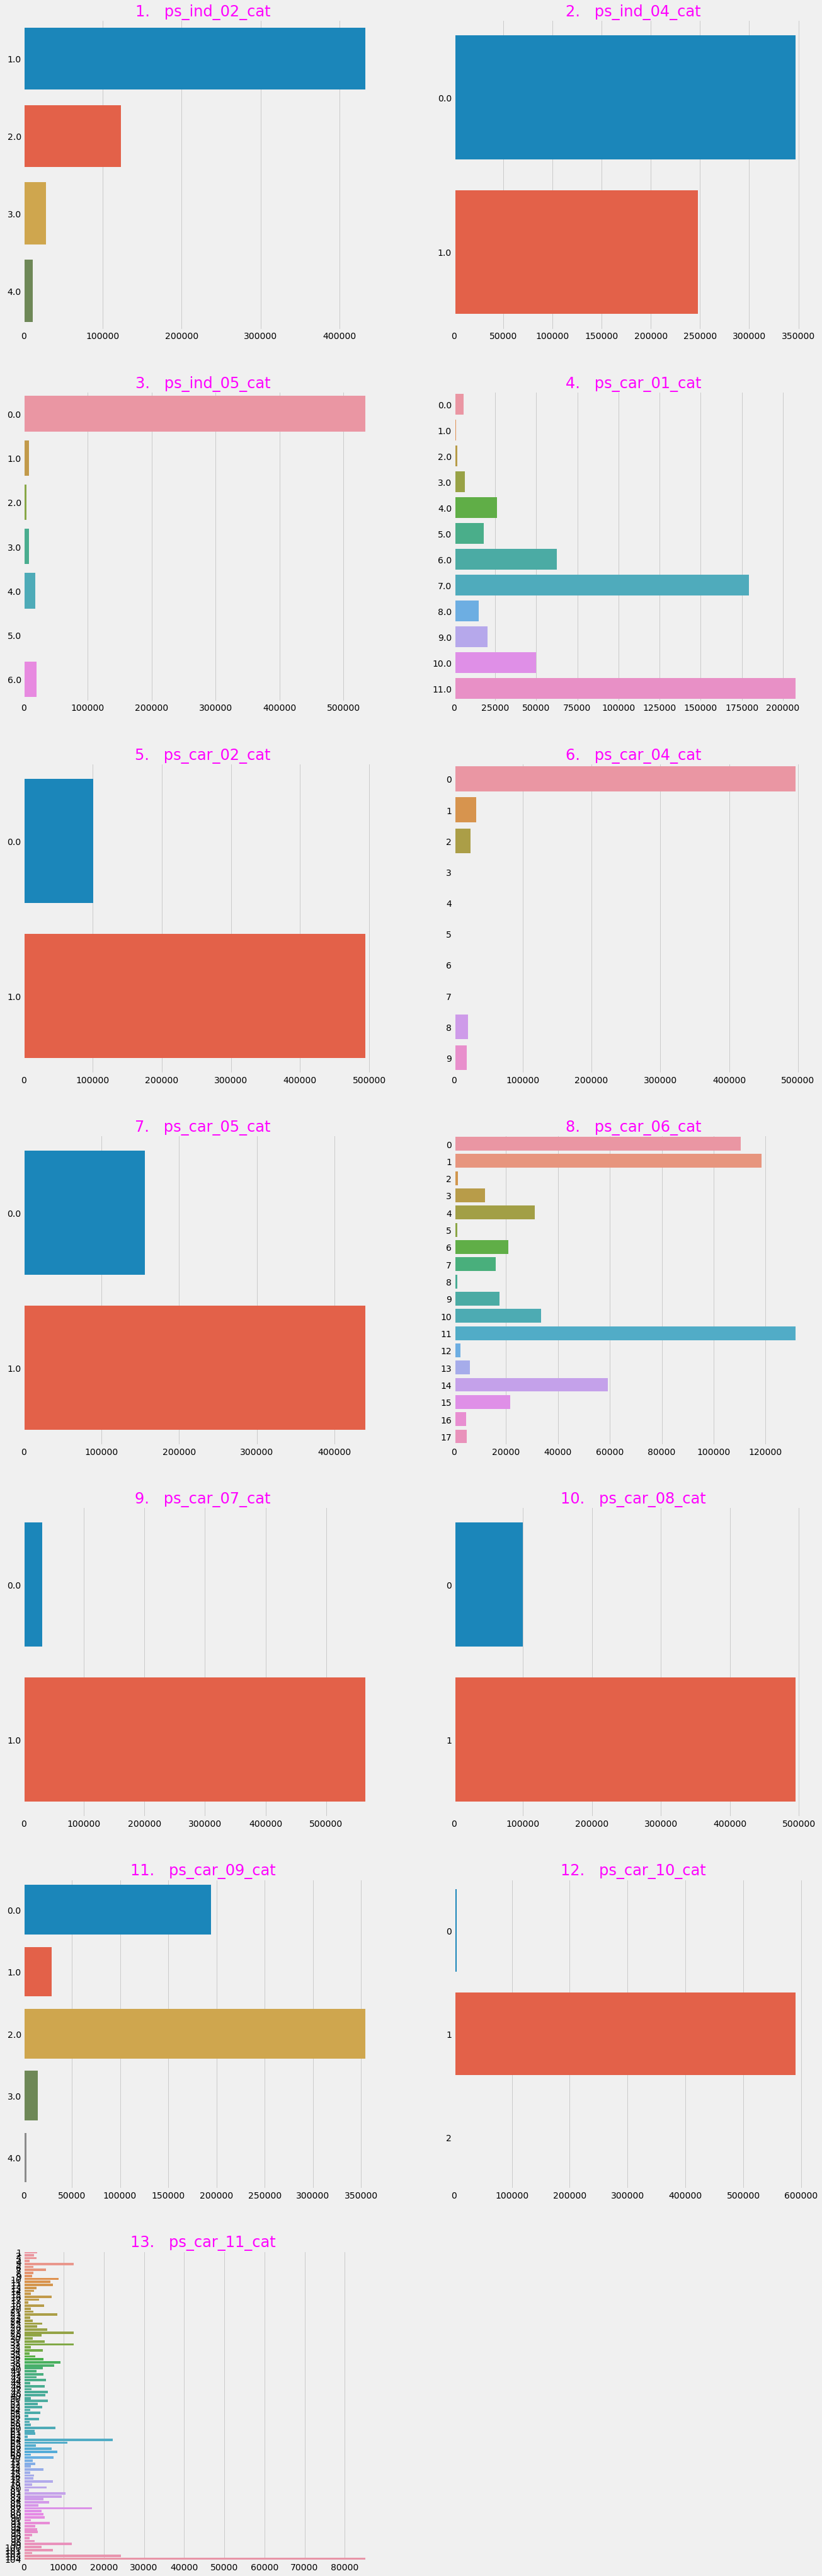

In [18]:
plt.rcParams['figure.figsize']=(20, 40)
matplotlib.style.use('fivethirtyeight')

plt.subplots_adjust(bottom=-0.2,top=1.2)
for i in range(len(cat_variable)):
    plt.subplot(7, 2, i+1)
    ax = sns.countplot(y= train[cat_variable[i]])
    plt.title(str(i+1) + '.' + '   ' + train[cat_variable[i]].name, size=24, color='magenta')
    ax.xaxis.set_label_text("")
    ax.yaxis.set_label_text("")
    
plt.show()

### The above plots show us the following 

> * We can see that these seven plots ('ps_ind_04_cat', 'ps_car_02_cat, 'ps_car_03_cat','ps_car_05_cat', 'ps_car_07_cat', 'ps_car_08_cat' and 'ps_car_10_cat') 
are categorised into two categories, although they are grouped under categorical data due to missing value (-1) that makes the third category. 
Due to the fact that we have taking care of our missing values above, this automatically turned the category data to binary. 
> * 'ps_car_10_cat' is almost always 1
> * Apart from 'ps_ind_04_cat', that has the most frequency in 0 category, the rest plots have most frequecy in their 1 category.
> * 'ps_car_11' 104 categories, which is so many.

### Categorical Feature Visualisation (binary dataset)

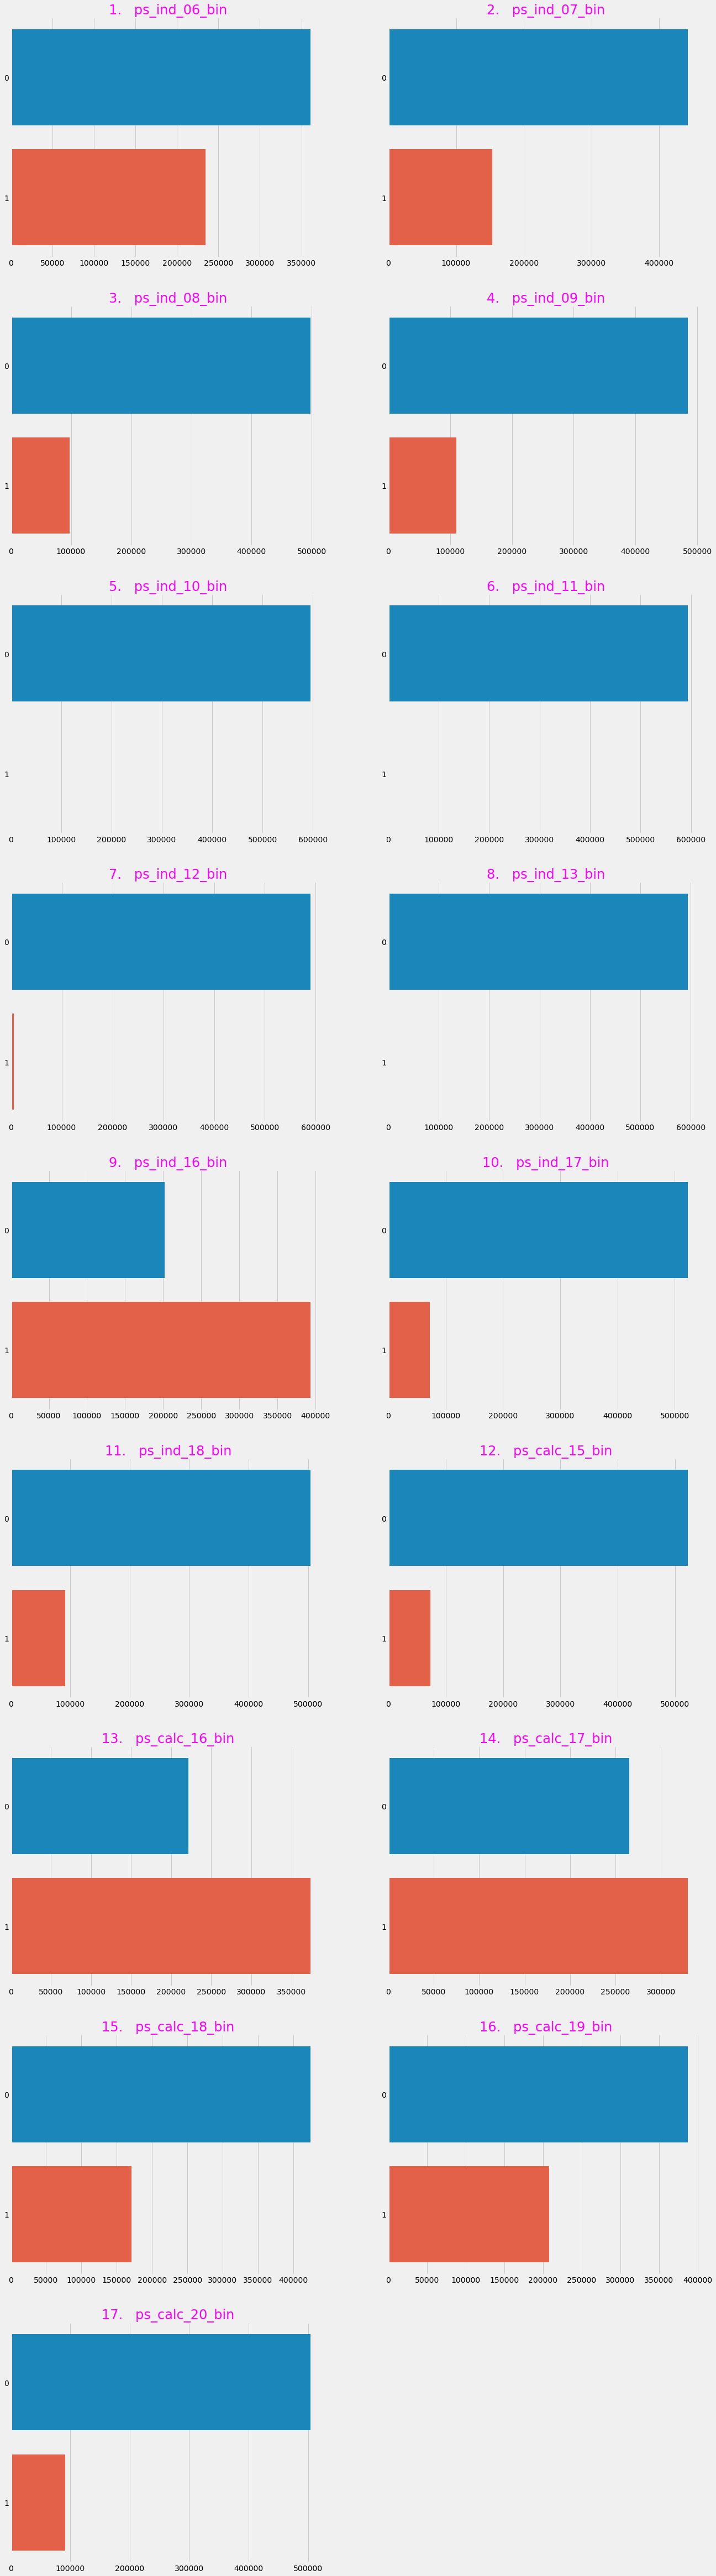

In [19]:
plt.rcParams['figure.figsize']=(20, 20)
matplotlib.style.use('fivethirtyeight')

#fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(bottom=-2.0,top=1.2)
for i in range(len(bin_variable)):
    plt.subplot(9, 2, i+1)
    ax = sns.countplot(y= train[bin_variable[i]])
    plt.title(str(i+1) + '.' + '   ' + train[bin_variable[i]].name, size=24, color='magenta')
    ax.xaxis.set_label_text("")
    ax.yaxis.set_label_text("")
    
plt.show()

 > * Apart from 'ps_ind_16_bin', 'ps_ind_16_bin', and 'ps_cal_17_bin',that have the most frequency in 1 category, the rest plots have most frequecy in their 0 category.
 > * 'ps_ind_10_bin' and 'ps_ind_11_bin', 'ps_ind_12_bin' and 'ps_ind_13_bin' are almost always 0.

### Ordinal Feature Visualisation 

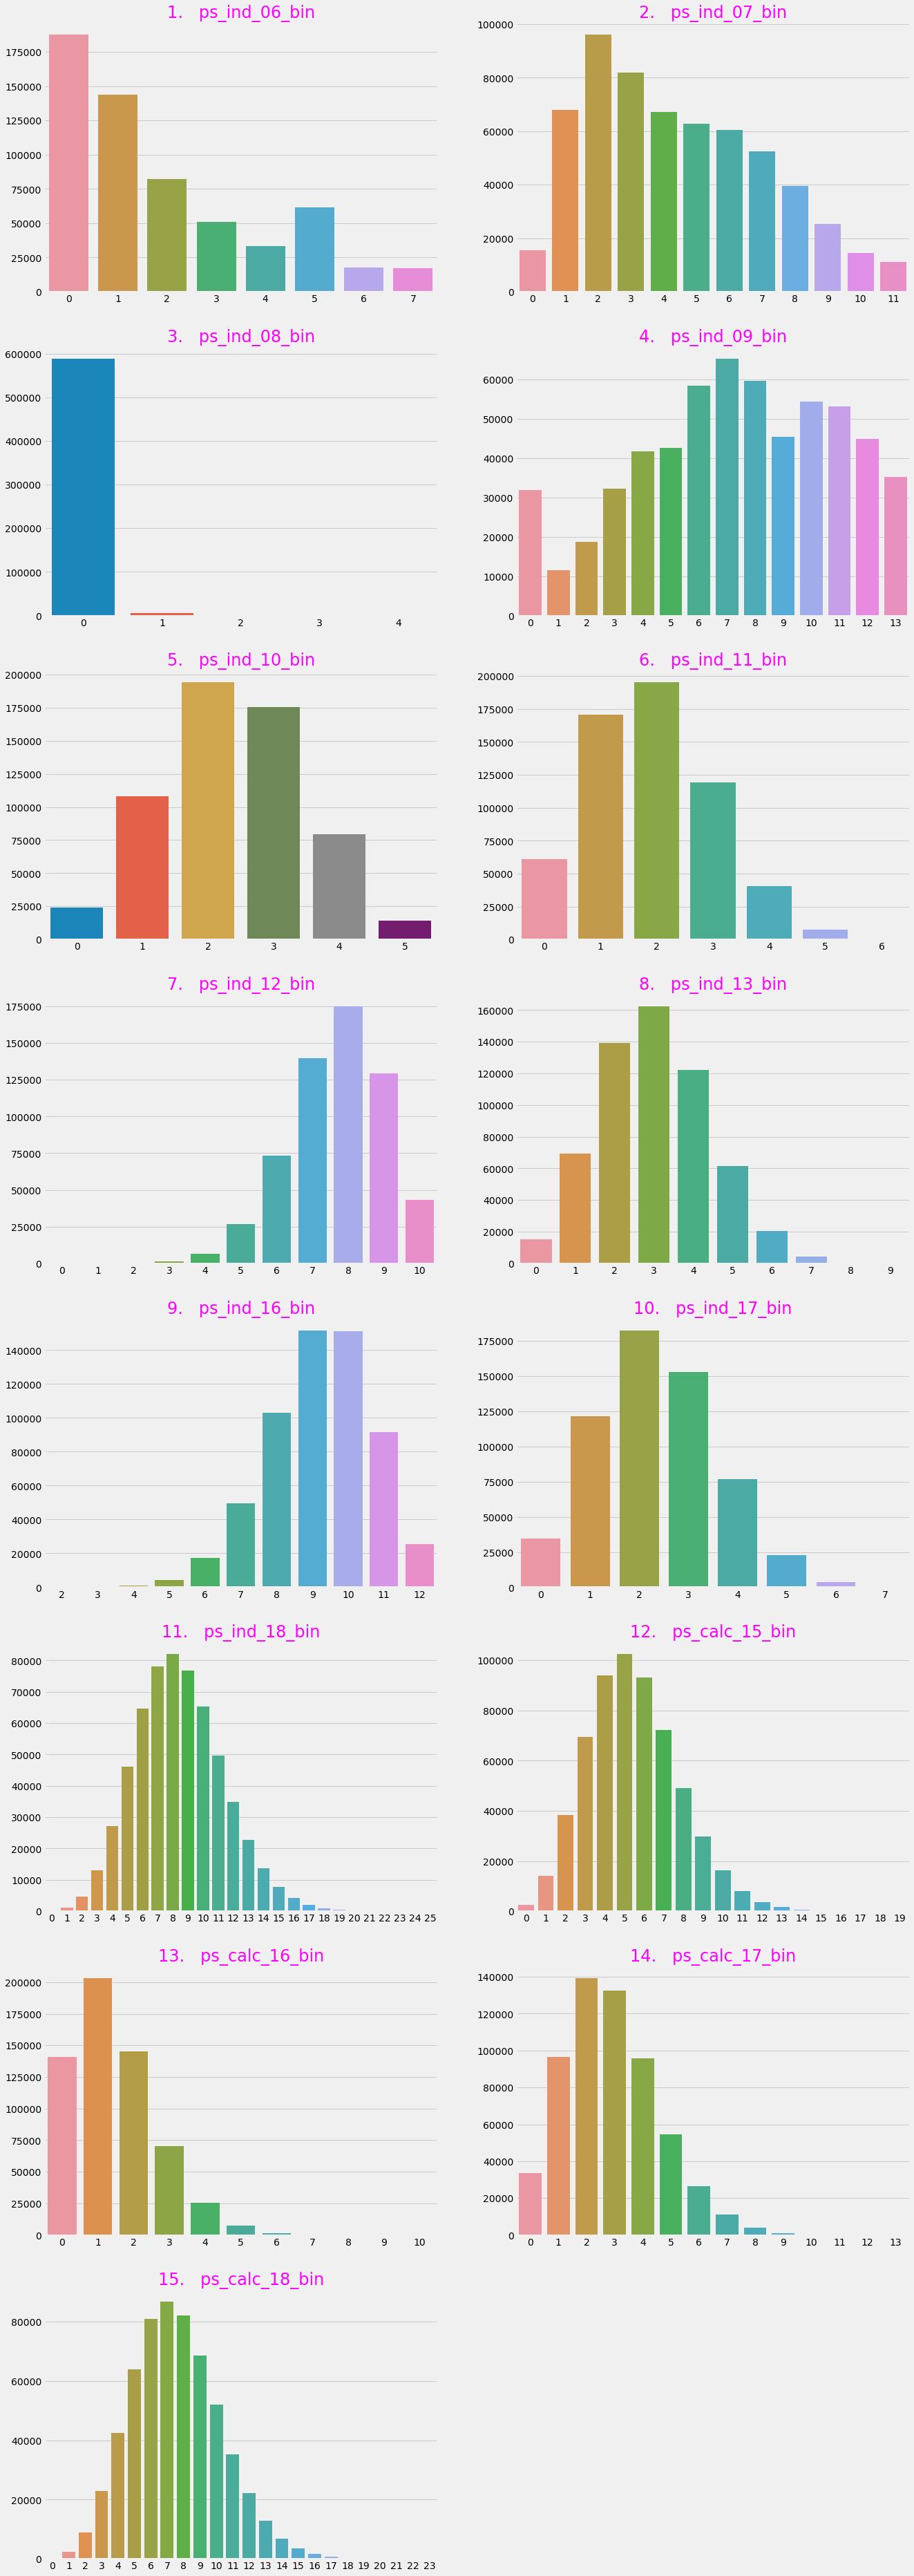

In [20]:
plt.rcParams['figure.figsize']=(20, 20)
matplotlib.style.use('fivethirtyeight')

#fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(bottom=-2.0,top=1.2)
for i in range(len(ordinal_features)):
    plt.subplot(10, 2, i+1)
    ax = sns.countplot(train[ordinal_features[i]])
    plt.title(str(i+1) + '.' + '   ' + train[bin_variable[i]].name, size=24, color='magenta')
    ax.xaxis.set_label_text("")
    ax.yaxis.set_label_text("")
    
plt.show()

> * The ordinal features have many categories only a few has features less than 5.
 > *  'ps_ind_14' has almost only 0s.

## Numerical Contineous Feature Visualisation

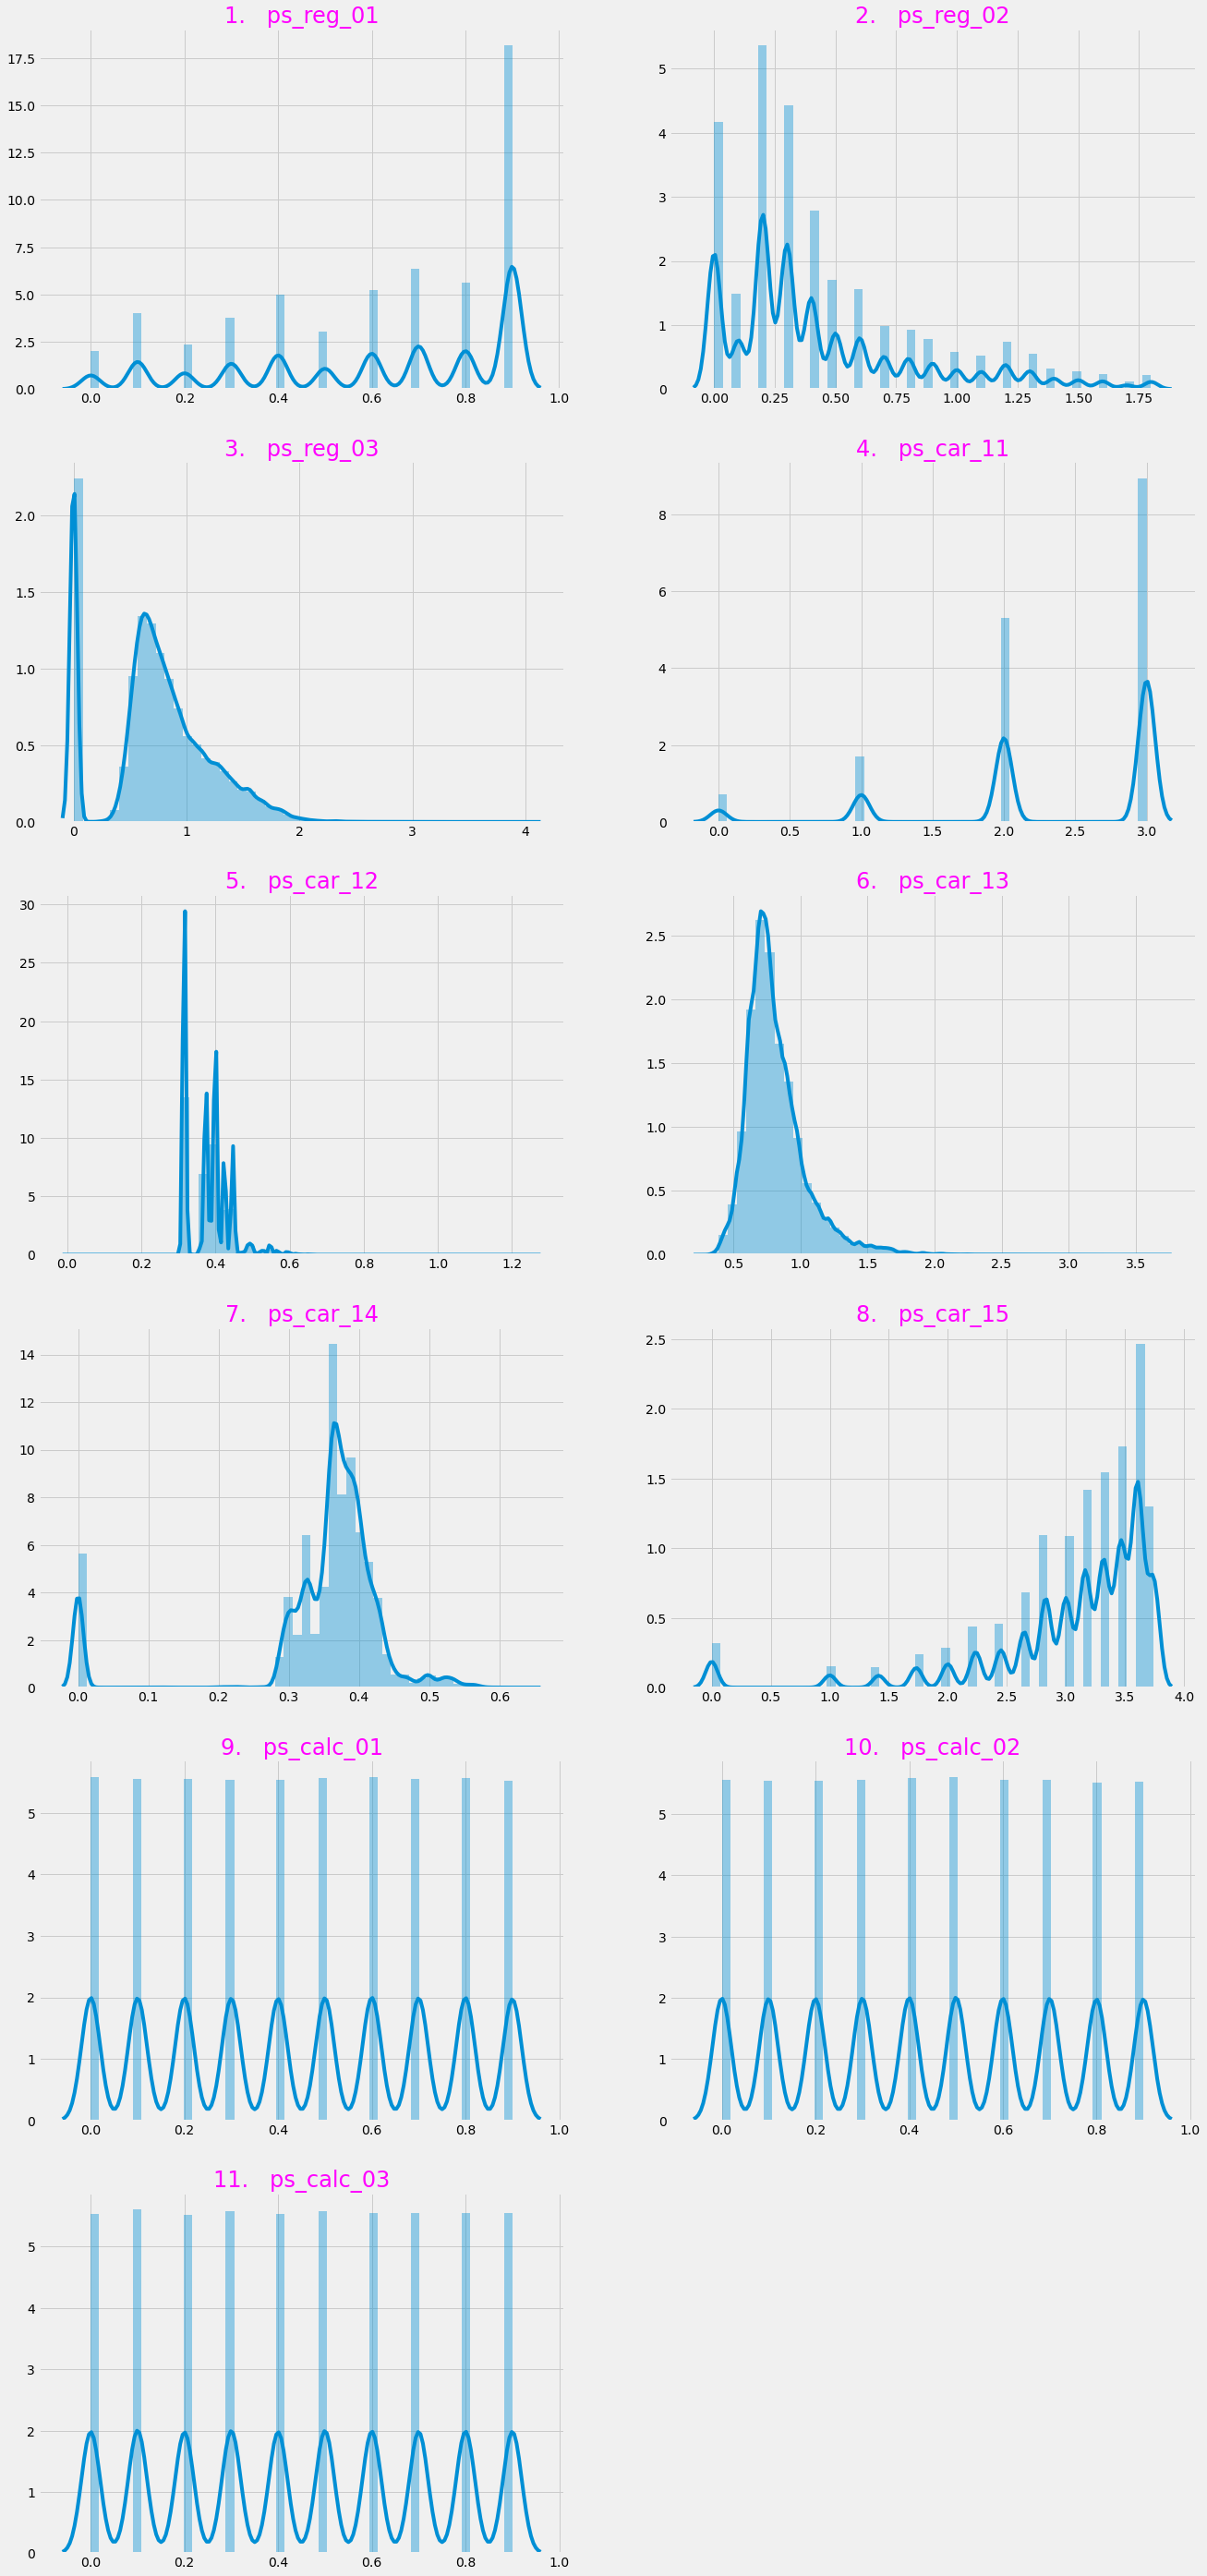

In [21]:
plt.rcParams['figure.figsize']=(20, 20)
matplotlib.style.use('fivethirtyeight')

#fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(bottom=-2.0,top=1.2)
for i in range(len(continuous_features)):
    plt.subplot(10, 2, i+1)
    ax = sns.distplot(train[continuous_features[i]])
    plt.title(str(i+1) + '.' + '   ' + train[continuous_features[i]].name, size=24, color='magenta')
    ax.xaxis.set_label_text("")
    ax.yaxis.set_label_text("")
    
plt.show()

> * Some of the features here are right skewed, some are left skewed while somse are uniform.
 > *  'ps_car_14' has an outlier.

### Correlation Plot

The below heatmap represents that there are no values greater than 0.9. This shows that no feature is depend on other.Suppose if heatvalue between two features are more than 0.95 then we take both features with same behavior and we can remove from data set.


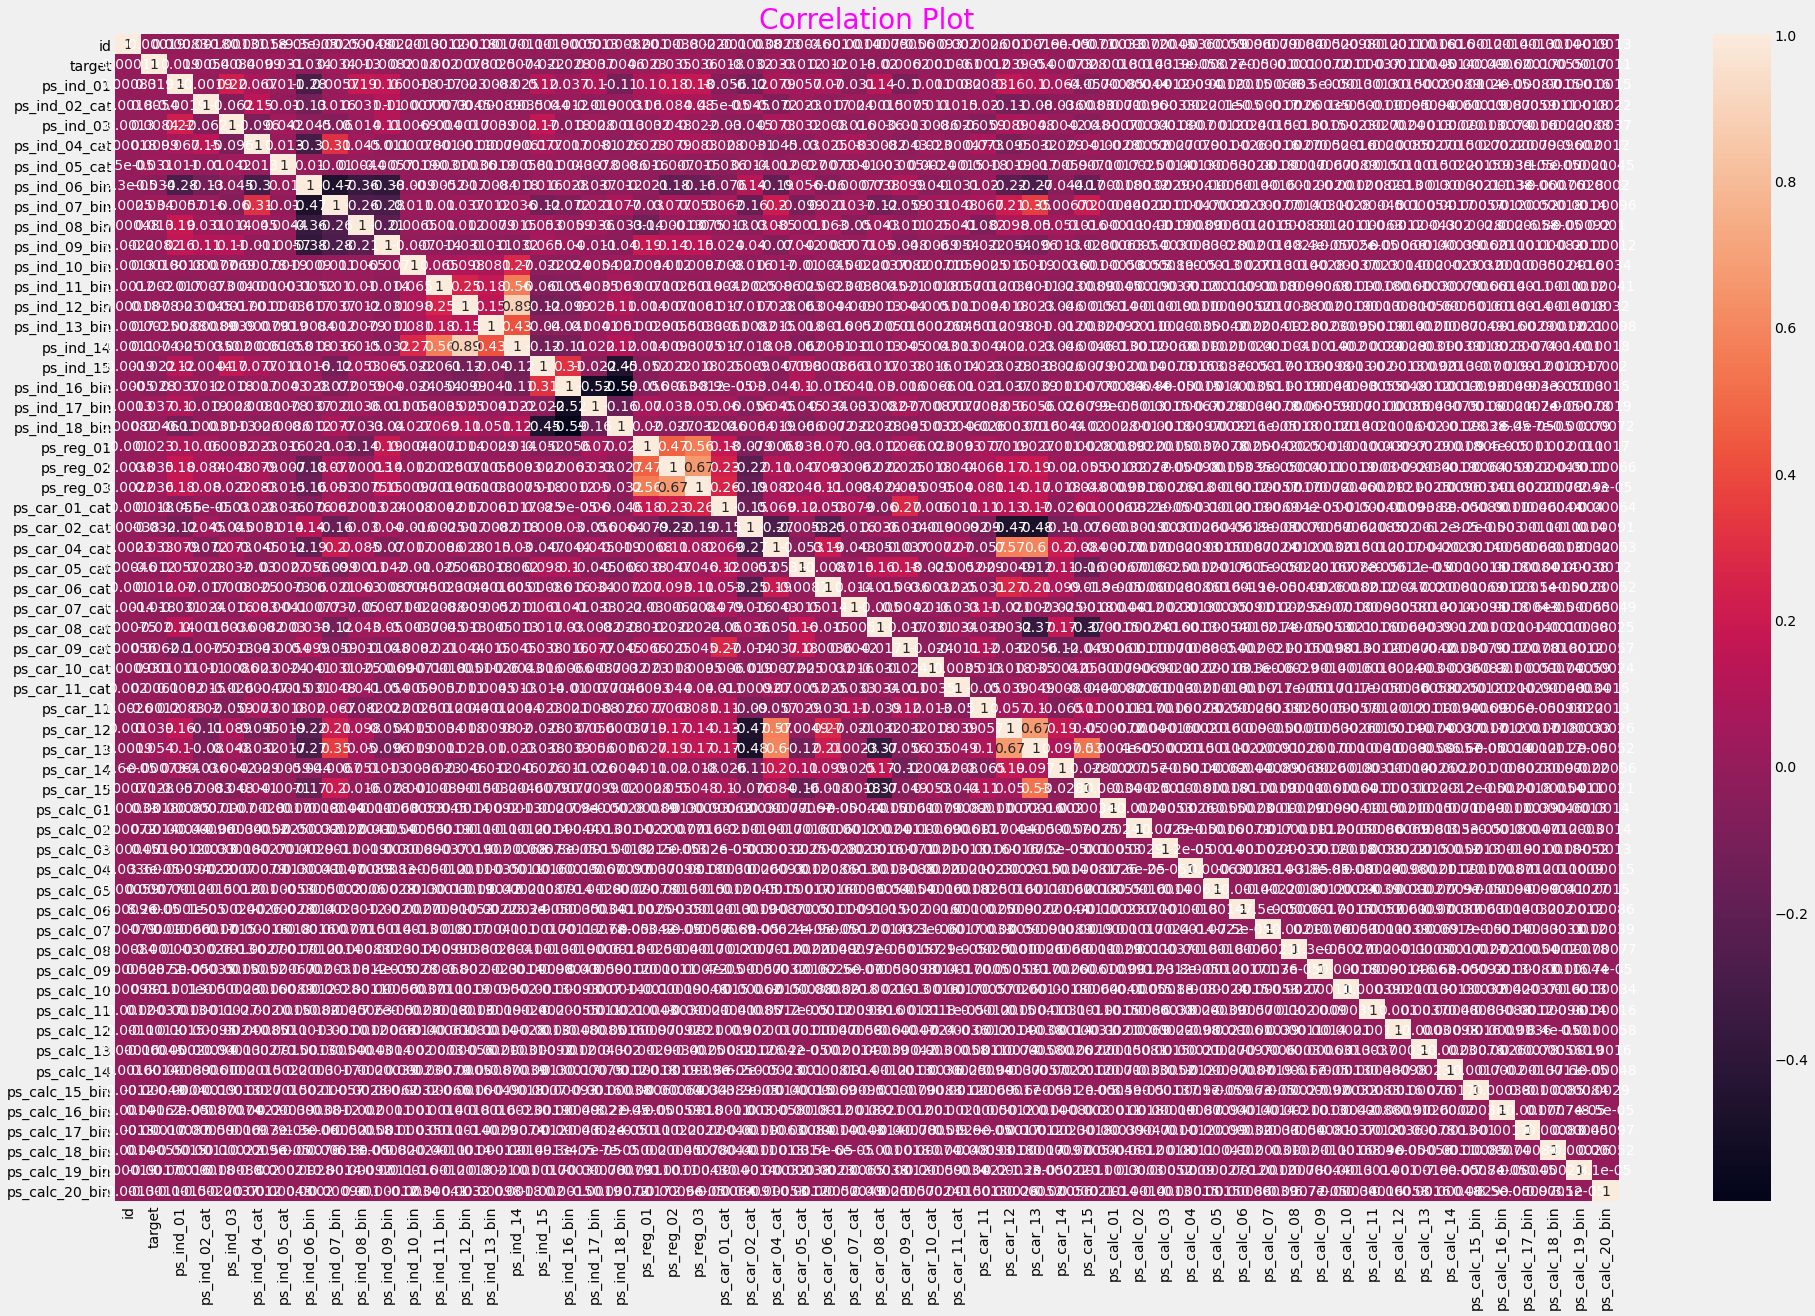

In [22]:
correlations = train.corr()
plt.rcParams['figure.figsize']=(30, 20)
matplotlib.style.use('fivethirtyeight')

#plt.figure(figsize=(30,20))
sns.heatmap(correlations, 
        xticklabels=correlations.columns,
        yticklabels=correlations.columns,annot=True)
plt.title("Correlation Plot", size=28, color='magenta')
plt.show()

#### Lets make a list of numerical,discrete and continous variables

In [23]:
num_vars = [var for var in train.columns if train[var].dtypes != 'O']
discrete_vars = [var for var in num_vars if len(
    train[var].unique()) < 20 ]
cont_vars = [
    var for var in num_vars if var not in discrete_vars]
print('Number of numerical variables: ', len(num_vars))
print('Number of discrete variables: ', len(discrete_vars))
print('Number of continuous variables: ', cont_vars)

Number of numerical variables:  58
Number of discrete variables:  49
Number of continuous variables:  ['id', 'ps_reg_03', 'ps_car_11_cat', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_calc_10', 'ps_calc_11', 'ps_calc_14']


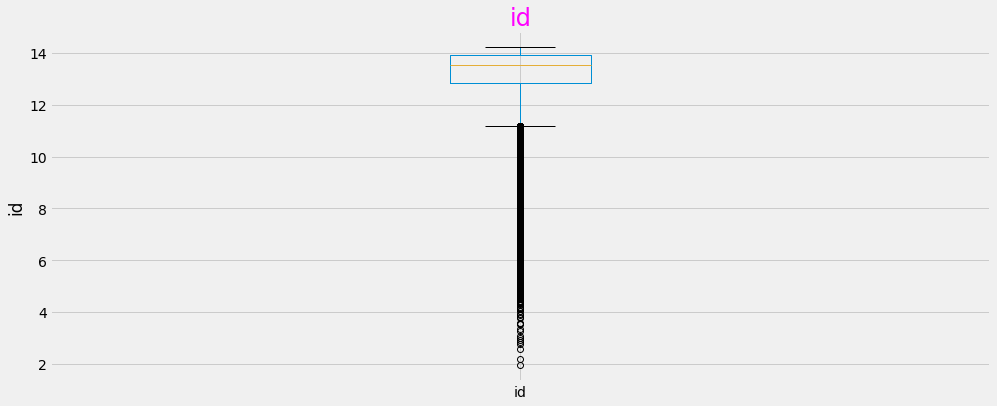

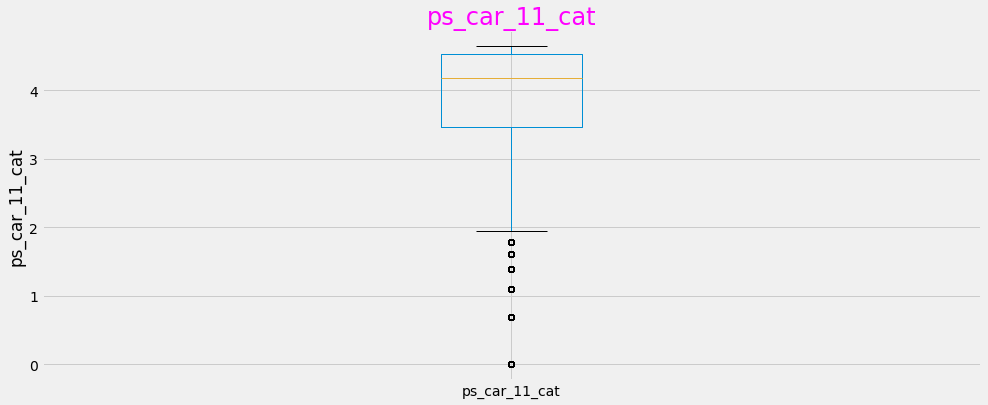

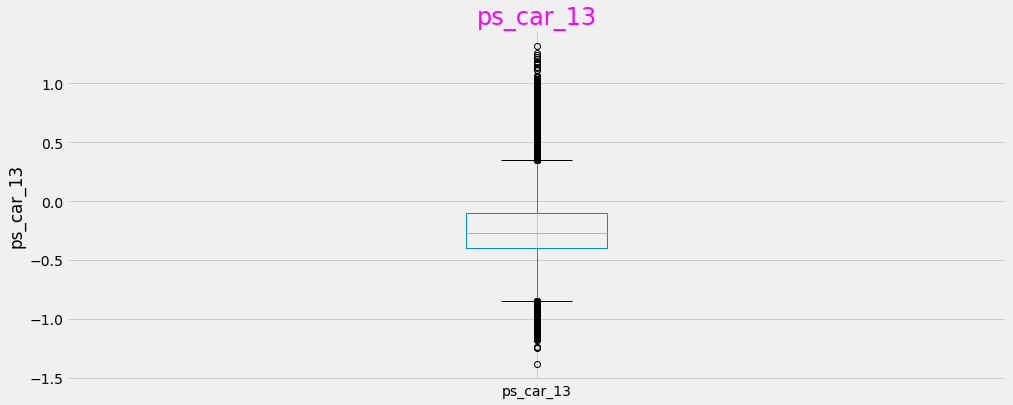

In [24]:
plt.rcParams['figure.figsize']=(15, 6)
matplotlib.style.use('fivethirtyeight')

def find_outliers(df, var):
    df = df.copy()
   
    if any(train[var] <= 0):
        pass
    else:
        df[var] = np.log(df[var])
        df.boxplot(column=var)
        plt.title(var, size=24, color='magenta')
        plt.ylabel(var)
        print()
        plt.show()
for var in cont_vars:
    find_outliers(train, var)
    

#### Boxplots to visualise outliers in the continuous variables

In [25]:
train[train['ps_car_11_cat'] < 2 ]

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
47,120,0,0,1.0,9,0.0,0.0,0,1,0,...,4,5,3,11,0,1,1,0,1,0
193,489,0,4,3.0,6,1.0,0.0,0,0,1,...,4,1,2,10,0,1,1,0,0,0
228,570,0,0,1.0,8,0.0,0.0,1,0,0,...,12,0,1,13,0,0,1,0,0,0
440,1193,0,3,1.0,2,0.0,0.0,0,0,1,...,5,5,0,8,0,1,1,0,0,0
539,1455,0,1,1.0,8,0.0,0.0,0,1,0,...,7,2,5,6,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592828,1481896,0,1,3.0,2,0.0,0.0,0,0,1,...,5,2,4,7,0,1,1,0,1,0
592830,1481899,0,3,1.0,8,0.0,0.0,0,0,1,...,4,0,1,4,0,1,1,0,1,1
593451,1483511,0,2,1.0,6,0.0,0.0,0,0,1,...,7,3,1,5,0,0,0,0,0,0
593811,1484469,0,1,2.0,3,0.0,0.0,0,0,1,...,2,0,3,3,0,1,0,0,0,0


#### Based on the analysis it is evident that the data is imbalanced and it can affect the model performance. In order to avoid imbalance in the data, Oversampling and undersampling methods are handled. Lets apply the model in both imbalanced and balanced data to compare the performance and metrics.

### Modelling for imbalanced data

In [26]:
y = train['target']
x = train.drop(['target','id'], axis=1)

print('Target dimentions: ',y.shape)
print('Independent data dimentions: ',x.shape)

import sklearn.model_selection as model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.7,test_size=0.3, random_state=101)

print('x_train dimentions: ',x_train.shape)
print('y_train  dimentions: ',y_train.shape)
print('x_test dimentions: ',x_test.shape)
print('y_test  dimentions: ',y_test.shape)

Target dimentions:  (595212,)
Independent data dimentions:  (595212, 56)
x_train dimentions:  (416648, 56)
y_train  dimentions:  (416648,)
x_test dimentions:  (178564, 56)
y_test  dimentions:  (178564,)


#### As all dimentions are correct, we can move towards model creation, training and testing

In [27]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report


classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SGDClassifier(max_iter=1000, tol=0.01)
    ]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

In [28]:
for clf in classifiers:
    model=clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = model.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    print(classification_report(y_test, train_predictions))
    print(confusion_matrix(y_test, train_predictions))
    
    
print("="*30)

DecisionTreeClassifier
****Results****
Accuracy: 91.8511%
              precision    recall  f1-score   support

           0       0.96      0.95      0.96    172051
           1       0.05      0.06      0.05      6513

    accuracy                           0.92    178564
   macro avg       0.51      0.51      0.51    178564
weighted avg       0.93      0.92      0.92    178564

[[163599   8452]
 [  6099    414]]
RandomForestClassifier
****Results****
Accuracy: 96.3526%
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    172051
           1       0.00      0.00      0.00      6513

    accuracy                           0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564

[[172051      0]
 [  6513      0]]
SGDClassifier
****Results****
Accuracy: 96.3526%
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    172051
  

#### Decision tree classifier: 
Decision Tree Classifier is a simple Machine Learning model that is used in classification problems. Decision Trees classifiers are used in classification tasks where the dataset is not huge and can be modelled by a simpler model. Also, we can use this classifier when we have only a few features available or if we need a model that can be visualised and explained in simpler terms. For a decision tree classifier, we need to pre-process the data using label encoder then train the decision tree model using the processed data. After that we can use the trained model to make predictions.

#### Random Forest Classifiers: 
Random decision forests represent a Machine Learning task that can be used for classification and regression problems. They work by constructing a variable number of decision tree classifiers or regressors and the output is obtained by corroborating the output of the all the decision trees to settle for a single result. Random forests are very powerful machine learning tools because they keep the simplicity of decision trees but employing the power of the ensemble and final output of the random forest classifier is the mode of the classes.
Random forests can be used:
•	both for classification and regression tasks.
•	when you have tried a decision tree already and you have concluded that you need higher accuracy and computational costs in terms of money, data or time are not a problem.
•	when you have tried a decision tree already and after testing and validation you observe your decision tree is overfitting.
•	if the dataset has too many features for a decision tree to handle.


#### SGD Classifier: 
Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to fitting linear classifiers and regressors under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. SGD has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing. Given that the data is sparse, the classifiers in this module easily scale to problems with more than 10^5 training examples and more than 10^5 features. It is merely an optimization technique and does not correspond to a specific family of machine learning models. It is only a way to train a model. 
The advantages of Stochastic Gradient Descent are:
•	Efficiency.
•	Ease of implementation (lots of opportunities for code tuning).
The disadvantages of Stochastic Gradient Descent include:
•	SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
•	SGD is sensitive to feature scaling.


In [29]:
testdf=test.drop(['id','ps_car_03_cat'], axis=1)
#testd.drop('ps_car_03_cat', axis = 1, inplace = True)
testdf.shape

(892816, 56)

In [30]:
filename = 'classification_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

#### Loading model to  imbalanced test data

In [31]:
tespred = loaded_model.predict(testdf)
tespred.shape

(892816,)

In [32]:
testdf['predicted_value'] = tespred
testdf.predicted_value.value_counts()

0    892816
Name: predicted_value, dtype: int64

### Clustering for imbalanced data

In [33]:
data = pd.read_csv('train.csv')
data=data.drop('id',axis=1)

In [34]:
#  let's male a list of discrete variables
discrete_vars = [var for var in data if len(data[var].unique()) < 20 ]


print('Number of discrete variables: ', len(discrete_vars))

cont_vars = [var for var in data if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of discrete variables:  50
Number of continuous variables:  8


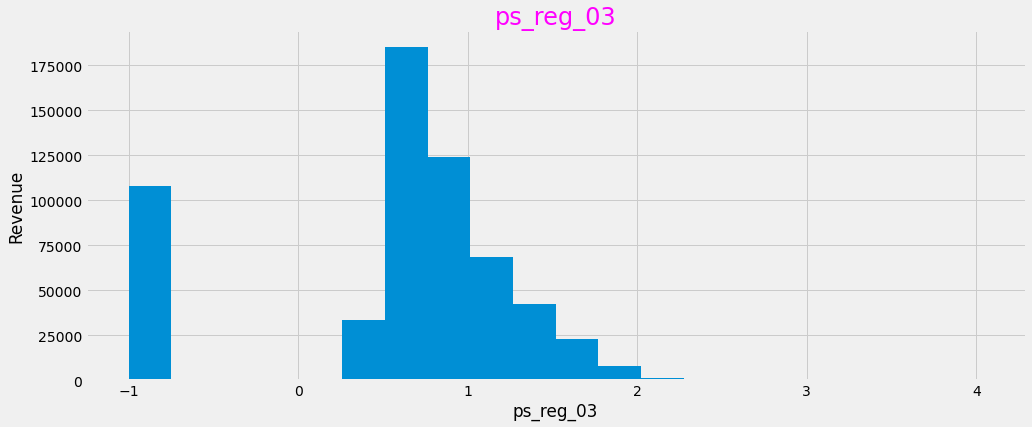

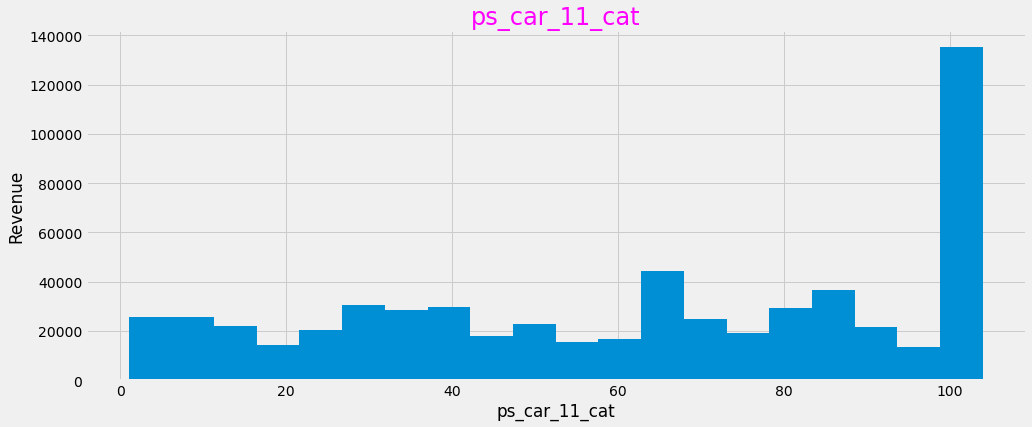

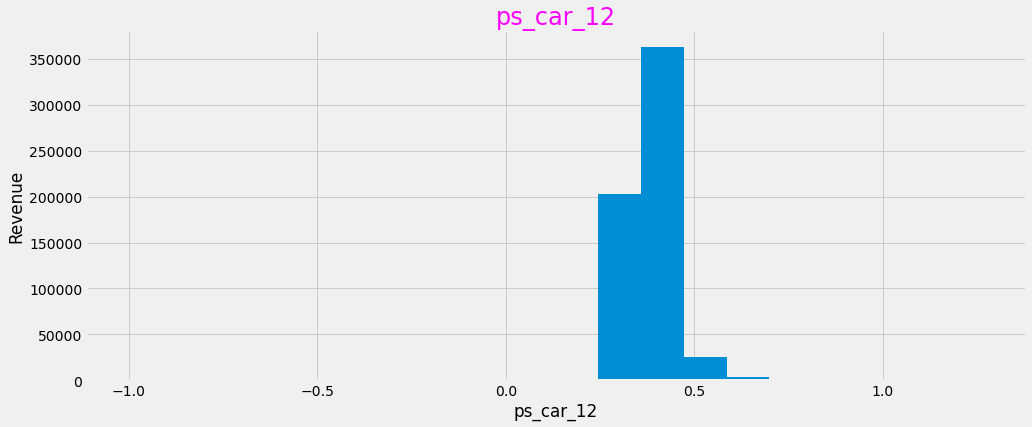

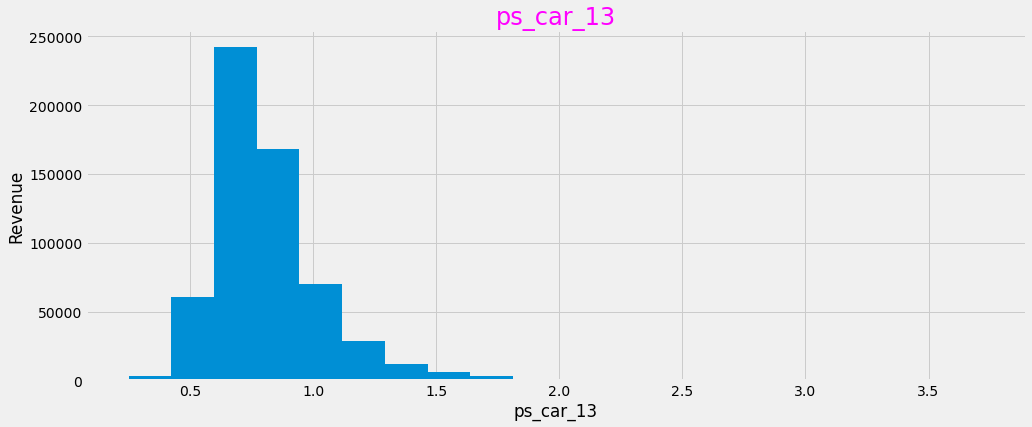

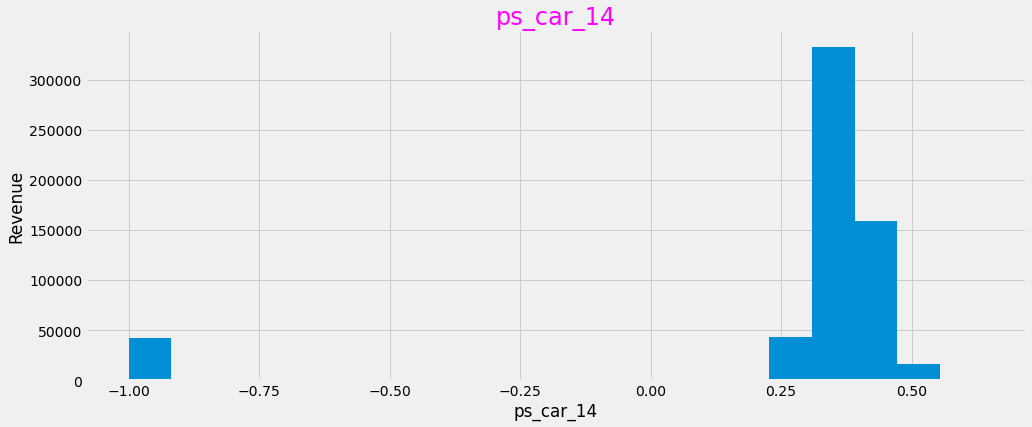

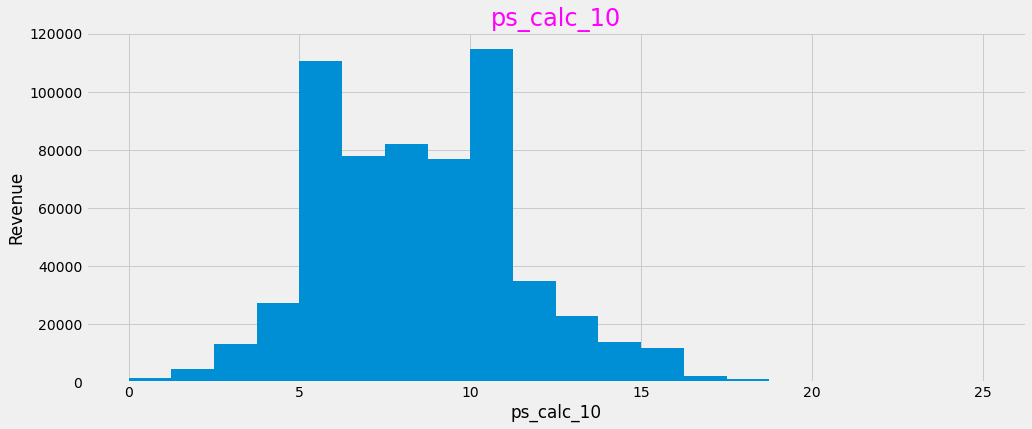

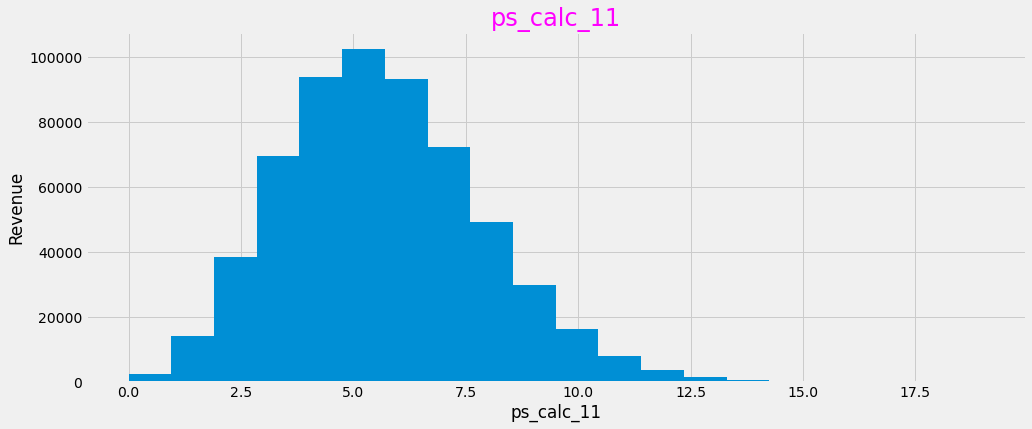

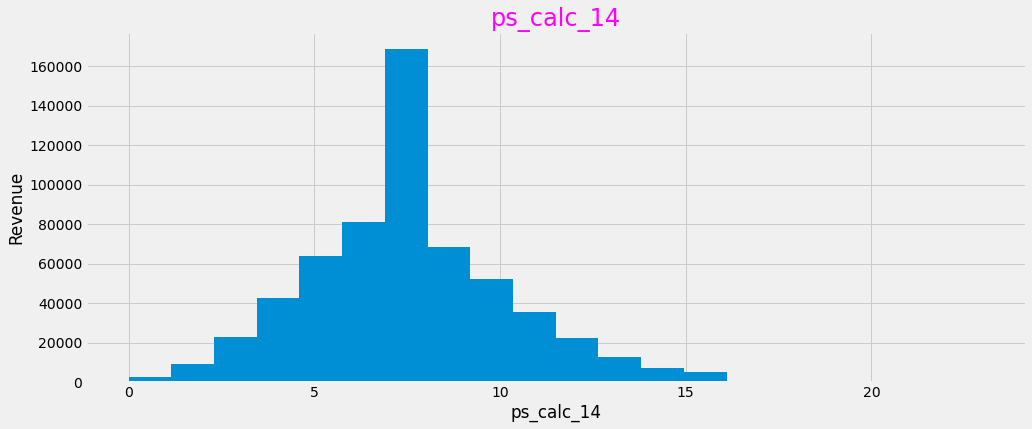

In [35]:
# Selecting only Days and week to analyse the number of product sold in each day and week
plt.rcParams['figure.figsize']=(15, 6)
matplotlib.style.use('fivethirtyeight')


def analyse_continuous(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.ylabel('Revenue')
    plt.xlabel(var)
    plt.title(var, size=24, color='magenta')
    plt.show()
    print()

for var in cont_vars:
    analyse_continuous(data, var)

In [36]:
from sklearn.preprocessing import MinMaxScaler# Instantiate the object
scaler = MinMaxScaler()# Fit and transform the data
X_transformed = scaler.fit_transform(data)
X_transformed

array([[0.        , 0.28571429, 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.14285714, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.71428571, 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.14285714, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.71428571, 0.6       , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.4       , ..., 0.        , 0.        ,
        0.        ]])

#### KNN Classifiers: 
Clustering k-means is an unsupervised clustering algorithm that captures and groups data into a number of clusters in k. Through evaluating the mean distance of said points, K-means clustering is able to eventually learn how to cluster the unlabeled points into groups. In this case, the k vector represents the number of clusters or classes in which the data is obtained. By shifting the data in such a way that the error function is minimized, the algorithm works.

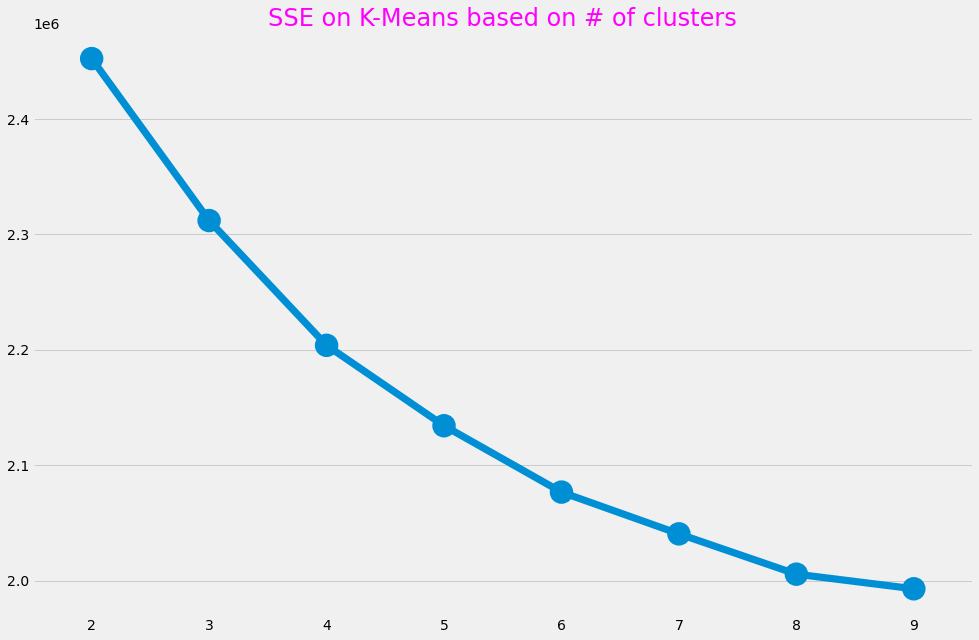

In [37]:
from sklearn.cluster import KMeans
np.random.seed(42)
inertia = []# Iterating the process

plt.rcParams['figure.figsize']=(15, 10)
matplotlib.style.use('fivethirtyeight')


for i in range(2, 10):
  # Instantiate the model
    model = KMeans(n_clusters=i)
  # Fit The Model
    model.fit(X_transformed)
  # Extract the error of the model
    inertia.append(model.inertia_)# Visualize the model
sns.pointplot(x=list(range(2, 10)), y=inertia)
plt.title('SSE on K-Means based on # of clusters', size=24, color='magenta')
plt.show()

In [38]:
np.random.seed(42)# Instantiate the model
model = KMeans(n_clusters=7)# Fit the model
model.fit(X_transformed)# Predict the cluster from the data and save it
cluster = model.predict(X_transformed)# Add to the dataframe and show the result
data['cluster'] = cluster
data.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,cluster
0,0,2,2,5,1,0,0,1,0,0,...,1,5,8,0,1,1,0,0,1,3
1,0,1,1,7,0,0,0,0,1,0,...,1,1,9,0,1,1,0,1,0,6
2,0,5,4,9,1,0,0,0,1,0,...,2,7,7,0,1,1,0,1,0,4
3,0,0,1,2,0,0,1,0,0,0,...,2,4,9,0,0,0,0,0,0,5
4,0,0,2,0,1,0,1,0,0,0,...,1,1,3,0,0,0,1,1,0,5


In [39]:
datac= []
for i in range(7):
    datac.append(data[data['cluster'] == i])    
for i,tar in enumerate(datac, start=1):
    print("Cluster no: {} \n{}" .format(i,tar.target.value_counts()))

Cluster no: 1 
0    97762
1     4287
Name: target, dtype: int64
Cluster no: 2 
0    81529
1     2672
Name: target, dtype: int64
Cluster no: 3 
0    106881
1      2869
Name: target, dtype: int64
Cluster no: 4 
0    68099
1     3977
Name: target, dtype: int64
Cluster no: 5 
0    68227
1     2659
Name: target, dtype: int64
Cluster no: 6 
0    63296
1     1722
Name: target, dtype: int64
Cluster no: 7 
0    87724
1     3508
Name: target, dtype: int64


### Balancing the class - Over sampling the minority class and undersampling the majority class 

In [40]:
train = pd.read_csv('train.csv')

In [41]:
X = train.drop(['target','id'], axis=1)
y = train['target']

In [42]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (595212, 57)
Shape of X after SMOTE: (1147036, 57)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: target, dtype: float64

In [43]:
import sklearn.model_selection as model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(X_sm, y_sm, train_size=0.7,test_size=0.3, random_state=101)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [45]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report


classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SGDClassifier(max_iter=1000, tol=0.01)
    ]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

In [46]:
for clf in classifiers:
    model=clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = model.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    print(classification_report(y_test, train_predictions))
    print(confusion_matrix(y_test, train_predictions))
    
print("="*30)

DecisionTreeClassifier
****Results****
Accuracy: 94.0723%
              precision    recall  f1-score   support

           0       0.95      0.93      0.94    172137
           1       0.93      0.95      0.94    171974

    accuracy                           0.94    344111
   macro avg       0.94      0.94      0.94    344111
weighted avg       0.94      0.94      0.94    344111

[[159580  12557]
 [  7841 164133]]
RandomForestClassifier
****Results****
Accuracy: 97.7969%
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    172137
           1       1.00      0.96      0.98    171974

    accuracy                           0.98    344111
   macro avg       0.98      0.98      0.98    344111
weighted avg       0.98      0.98      0.98    344111

[[171487    650]
 [  6931 165043]]
SGDClassifier
****Results****
Accuracy: 86.5343%
              precision    recall  f1-score   support

           0       0.87      0.86      0.86    172137
  

In [47]:
import pickle
filename = 'classification_model_balanced.sav'
pickle.dump(model, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

testdata = pd.read_csv('test.csv')
testdf=testdata.drop('id',axis=1)
tespred = loaded_model.predict(testdf)
testdf['predicted_value'] = tespred

In [48]:
testdf.predicted_value.value_counts()

0    769487
1    123329
Name: predicted_value, dtype: int64

In [49]:
iddf=testdata.iloc[:,:1]

In [50]:
testdf['id'] = iddf

### Clustering for balanced data

In [51]:
X_sm['target_value'] =y_sm
X_sm.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target_value
0,2,2,5,1,0,0,1,0,0,0,...,1,5,8,0,1,1,0,0,1,0
1,1,1,7,0,0,0,0,1,0,0,...,1,1,9,0,1,1,0,1,0,0
2,5,4,9,1,0,0,0,1,0,0,...,2,7,7,0,1,1,0,1,0,0
3,0,1,2,0,0,1,0,0,0,0,...,2,4,9,0,0,0,0,0,0,0
4,0,2,0,1,0,1,0,0,0,0,...,1,1,3,0,0,0,1,1,0,0


In [52]:
#  let's male a list of discrete variables
discrete_vars = [var for var in X_sm if len(X_sm[var].unique()) < 20 ]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  44


In [53]:
cont_vars = [var for var in X_sm if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  14


In [54]:
from sklearn.preprocessing import MinMaxScaler# Instantiate the object
scaler = MinMaxScaler()# Fit and transform the data
X_transformed = scaler.fit_transform(X_sm)

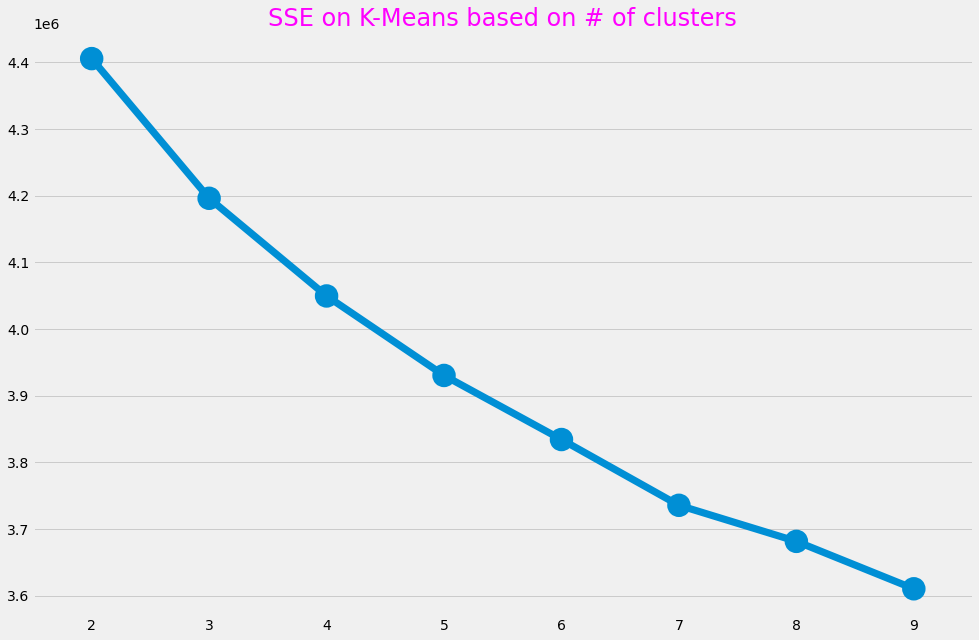

In [55]:
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize']=(15, 10)
matplotlib.style.use('fivethirtyeight')

np.random.seed(42)
inertia = []# Iterating the process
for i in range(2, 10):
  # Instantiate the model
    model = KMeans(n_clusters=i)
  # Fit The Model
    model.fit(X_transformed)
  # Extract the error of the model
    inertia.append(model.inertia_)# Visualize the model
sns.pointplot(x=list(range(2, 10)), y=inertia)
plt.title('SSE on K-Means based on # of clusters', size=24, color='magenta')
plt.show()

In [56]:
np.random.seed(42)# Instantiate the model
model = KMeans(n_clusters=6)# Fit the model
model.fit(X_transformed)# Predict the cluster from the data and save it
cluster = model.predict(X_transformed)# Add to the dataframe and show the result
X_sm['cluster'] = cluster
X_sm.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target_value,cluster
0,2,2,5,1,0,0,1,0,0,0,...,5,8,0,1,1,0,0,1,0,4
1,1,1,7,0,0,0,0,1,0,0,...,1,9,0,1,1,0,1,0,0,0
2,5,4,9,1,0,0,0,1,0,0,...,7,7,0,1,1,0,1,0,0,0
3,0,1,2,0,0,1,0,0,0,0,...,4,9,0,0,0,0,0,0,0,3
4,0,2,0,1,0,1,0,0,0,0,...,1,3,0,0,0,1,1,0,0,3


In [57]:
datac= []
for i in range(6):
    datac.append(X_sm[X_sm['cluster'] == i])    

In [58]:
for i,tar in enumerate(datac, start=1):
    print("Cluster no: {} \n{}" .format(i,tar.target_value.value_counts()))

Cluster no: 1 
0    93441
1    13518
Name: target_value, dtype: int64
Cluster no: 2 
1    325296
Name: target_value, dtype: int64
Cluster no: 3 
0    106553
1     12472
Name: target_value, dtype: int64
Cluster no: 4 
0    227043
1     23367
Name: target_value, dtype: int64
Cluster no: 5 
0    145602
1     20145
Name: target_value, dtype: int64
Cluster no: 6 
1    178720
0       879
Name: target_value, dtype: int64


### Conclusion and Future Work

From the above analysis, it is evident that Random forest classifier and stochastic gradient descent classifier are best model to identify the number of customers who are likely to claim in the upcoming years. To identify particular group of customers who are likely to claim is identified using clustering technique in which the cluster 7 are more likely to claim followed by cluster 2 and cluster 6 is less likely to claim. These particular group of customers insured vehicles can be monitored and alert them by sending notifications to avoid risk of accidents and claims. Further to improve accuracy score ensemble method with a deep learning model can be used implemented to find best accuracy model for claim prediction accuracy.
